In [1]:
#all the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import statsmodels.formula.api as statsmod

In [2]:
car_sales = pd.read_csv("toyota.csv")

In [3]:
print(car_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB
None


# **Data validation**

I have received this dataset: 6738 cars sold in the past 6 months. Electric cars do not pay road tax. There are not apparent missing data in this dataset. I'm switching the 2 columns into categorical to gain some space and will explore what information I can gather from this dataset.

  Column    |    Non-Null Count | Dtype  
  ------    |    -------------- |   -----  
  model  |    6738 non-null  |  object 
  year   |    6738 non-null  |  int64  
  price  |    6738 non-null  |  int64  
  transmission | 6738 non-null |  object 
  mileage |   6738 non-null | int64  
  fuelType |  6738 non-null  |  object 
  tax    |    6738 non-null  |  int64  
  mpg    |    6738 non-null  |  float64
  engineSize  |  6738 non-null  | float64

## **Columns "model" and "fuelType**

Models : ' Auris', ' Avensis', ' Aygo', ' C-HR', ' Camry', ' Corolla', ' GT86',
       ' Hilux', ' IQ', ' Land Cruiser', ' PROACE VERSO', ' Prius', ' RAV4',
       ' Supra', ' Urban Cruiser', ' Verso', ' Verso-S', ' Yaris'

Fuel types : 'Diesel', 'Hybrid', 'Other', 'Petrol'

I made a table crosstab to see the type of fuel each of our models offer.

Model       |   Diesel | Hybrid | Other | Petrol
--------    |  ------- | ------ | ----- | -----                                                         
Auris       |       42 |    498 |     1 |    171
Avensis     |       76 |      0 |     0 |     39
Aygo        |        0 |      0 |    59 |   1902
C-HR        |        0 |    352 |     7 |    120
Camry       |        0 |     11 |     0 |      0
Corolla     |        1 |    181 |     2 |     83
GT86        |        0 |      0 |     0 |     73
Hilux       |       86 |      0 |     0 |      0
IQ          |        0 |      0 |     0 |      8
Land Cruiser|       51 |      0 |     0 |      0
PROACE VERSO |      15 |      0 |     0 |      0
Prius       |        0 |    214 |    18 |      0
RAV4        |      180 |    230 |     5 |     58
Supra       |        0 |      0 |     1 |     11
Urban Cruiser |      1 |      0 |     0 |      3
Verso       |       29 |      0 |     2 |     83
Verso-S     |        0 |      0 |     0 |      3
Yaris       |       22 |    557 |    10 |   1533


3 models were only diesel: Hilux, Land Cruiser, PROACE VERSO

In [10]:
car_sales[["model","fuelType","transmission"]] = car_sales[["model","fuelType","transmission"]].astype("category")
models = car_sales["model"].cat.categories
fuel_types = car_sales["fuelType"].cat.categories
nb_fuelType_per_model = pd.crosstab(car_sales["model"], car_sales["fuelType"])

In [5]:
car_sales[["fuelType", "model", "transmission"]] = car_sales[["fuelType", "model", "transmission"]].astype("category")
print(car_sales["fuelType"].cat.categories)

Index(['Diesel', 'Hybrid', 'Other', 'Petrol'], dtype='object')


In [6]:
print(car_sales["fuelType"].value_counts())

fuelType
Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: count, dtype: int64


## **Column "year"**



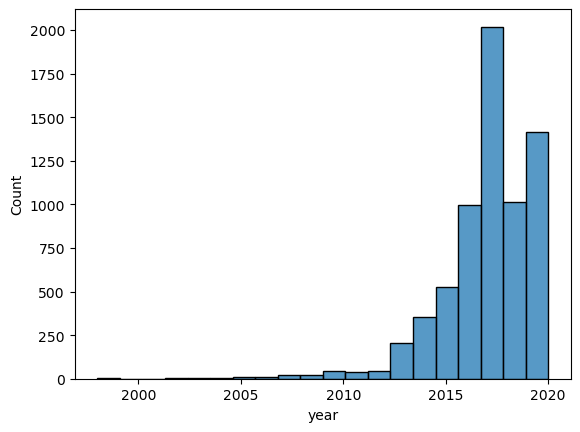

2021.0
2013.0
[1998, 1]
[2020, 128]


In [24]:
#year
sns.histplot(car_sales["year"], bins=20)
plt.show()

#outliers

def outliers(data,column) :
    summary_stat = data[column].describe()
    IQR = summary_stat["75%"] - summary_stat["25%"]
    upper = summary_stat["75%"] + 1.5*IQR
    lower = summary_stat["25%"] - 1.5*IQR
    return upper , lower

upper_year, lower_year = outliers(car_sales,"year")
print(upper_year)
print(lower_year)

#Function to quickly find the cars that have minimum and maximum cell values
def min_max(data,column):
    minimum = []
    min = data[column].min()
    min_l = len(data[data[column] == min])
    minimum.append(min)
    minimum.append(min_l)
    maximum = []
    max = data[column].max()
    max_l = len(data[data[column] == max])
    maximum.append(max)
    maximum.append(max_l)
    return minimum, maximum

min_year , max_year = min_max(car_sales, "year")
print(min_year)
print(max_year)

We have a left skewd distribution. with one very old car. Let's the attributs of this old car.

In [25]:
oldest_car = car_sales[car_sales["year"] == min_year[0]]
print(oldest_car)

              model  year  price transmission  mileage fuelType  tax   mpg  \
6694   Land Cruiser  1998  19990       Manual   100000   Diesel  265  23.9   

      engineSize  
6694         4.2  


## ** The "price" column**

Interestingly, the oldest car wasn't the cheapest. It was actually sold at a price higher than both the median and the mean. What were therefore the arguments to sale this car at this price? This is a question we need to consider in our analysis.

The mean price is higher than the median suggesting a heaviest influence of expensive car. Let's the attributes of the most expensive car.

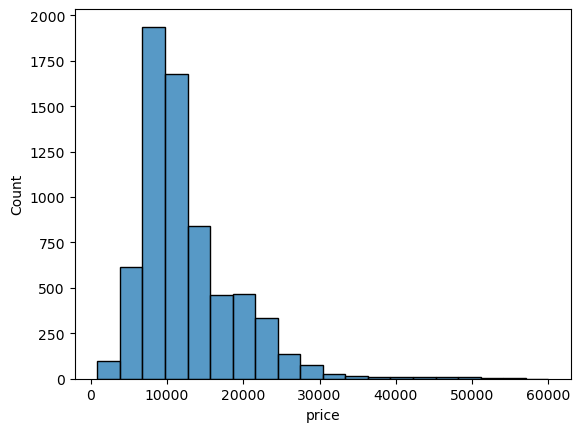

count     6738.000000
mean     12522.391066
std       6345.017587
min        850.000000
25%       8290.000000
50%      10795.000000
75%      14995.000000
max      59995.000000
Name: price, dtype: float64


In [28]:
#visu "price"
sns.histplot(car_sales["price"], bins=20)
plt.show()

#description
print(car_sales["price"].describe())

In [30]:
min_price , max_price = min_max(car_sales,"price")
cheapest_car = car_sales[car_sales["price"] == min_price[0]]
most_exp_car = car_sales[car_sales["price"] == max_price[0]]

print(most_exp_car)
print(cheapest_car)

       model  year  price transmission  mileage fuelType  tax   mpg  \
6711   Supra  2019  59995    Automatic     9909    Other  150  34.5   

      engineSize  
6711         3.0  
         model  year  price transmission  mileage fuelType  tax   mpg  \
6427   Avensis  2003    850       Manual   167054   Diesel  205  48.7   

      engineSize  
6427         2.0  


The most expensive car in our dataset is a Toyota Supra model 2019. It's a sport car. It consumes more fuel than our old Land cruiser. It's an automatic which is a bit weird. One would think that you buy a sport car to enjoy riding it and therefore you would prefer a manual. 
The cheapest car is a Toyota Avensis (850GBP) model 2003. I'm not an expert, but I believe this is way too cheap for this model. Let's see if we can find other Avensis.

In [37]:
car_sales["model"] = car_sales["model"].str.strip()
Avensis_cars = car_sales[car_sales["model"] == "Avensis"]
print(len(Avensis_cars))

115


We only have one Avensis model 2003. However, we have sold 115 Avensis cars enough to see the median and average price.

count      115.000000
mean      9884.356522
std       3376.061580
min        850.000000
25%       7950.000000
50%      10275.000000
75%      12396.500000
max      16495.000000
Name: price, dtype: float64


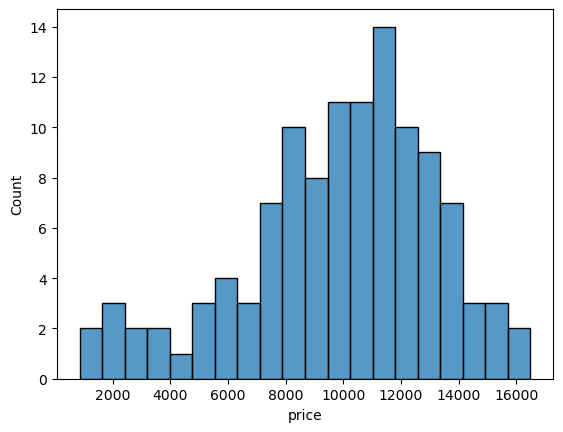

fuelType
Diesel     9775.0
Hybrid        NaN
Other         NaN
Petrol    12498.0
Name: price, dtype: float64


C:\Users\Angelique\AppData\Local\Temp\ipykernel_1772\1044094373.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(Avensis_cars.groupby("fuelType")["price"].median())


In [40]:
print(Avensis_cars["price"].describe())

#visu
sns.histplot(Avensis_cars["price"], bins=20)
plt.show()

print(Avensis_cars.groupby("fuelType")["price"].median())

Based on the summary stat above, I'm pretty confident that a 0 is missing in our cheapest model. I will not remove this row but rather add a 0 int the price (switch from 850GBP to 8500GBP). However, I will notify the sale team in case someone sold this car to friend at this correct very cheap price.

In [43]:
#rectifying the price of the cheapest Avensis
car_sales["price"] = car_sales["price"].replace(850,8500)
print(car_sales["price"].min())


899


I have now another cheap price (this cleaning never ends :) ). Now the cheapest car was sold for 899GBP.

In [11]:
print(car_sales["transmission"].isna().sum())
print(car_sales["transmission"].cat.categories)

0
Index(['Automatic', 'Manual', 'Other', 'Semi-Auto'], dtype='object')


In [8]:
print(car_sales.groupby("fuelType")["transmission"].value_counts())

fuelType  transmission
Diesel    Manual           378
          Automatic         97
          Semi-Auto         28
          Other              0
Hybrid    Automatic       2038
          Manual             4
          Other              1
          Semi-Auto          0
Other     Automatic        100
          Manual             5
          Other              0
          Semi-Auto          0
Petrol    Manual          3439
          Automatic        422
          Semi-Auto        226
          Other              0
Name: count, dtype: int64


C:\Users\Angelique\AppData\Local\Temp\ipykernel_1772\1871893609.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(car_sales.groupby("fuelType")["transmission"].value_counts())


In [9]:
#what I think are actually e-cars
potential_e_cars = car_sales[(car_sales["fuelType"] == "Other") & (car_sales["transmission"] == "Automatic")]
print(potential_e_cars.head())

        model  year  price transmission  mileage fuelType  tax   mpg  \
73    Corolla  2019  22500    Automatic     8006    Other  140  85.6   
307   Corolla  2020  25990    Automatic     1112    Other  135  53.3   
340      RAV4  2019  30500    Automatic    13326    Other  140  51.1   
768      RAV4  2017  18000    Automatic    26972    Other  205  43.5   
769      RAV4  2017  20000    Automatic     4909    Other  200  43.5   

     engineSize  
73          1.8  
307         2.0  
340         2.5  
768         2.0  
769         2.0  
